In [1]:
!pip install matplotlib seaborn
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df=pd.read_csv('C:/Users/vbsr0/Desktop/softwares and notes-20250719T171616Z-1-001/python projects/moderation_dashboard/data/moderation_raw.csv')
df['date']= pd.to_datetime(df['date'])
df['month']= df['date'].dt.to_period('M')
df['accuracy']= df['correct_decision'].astype(int)


[notice] A new release of pip is available: 25.1.1 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


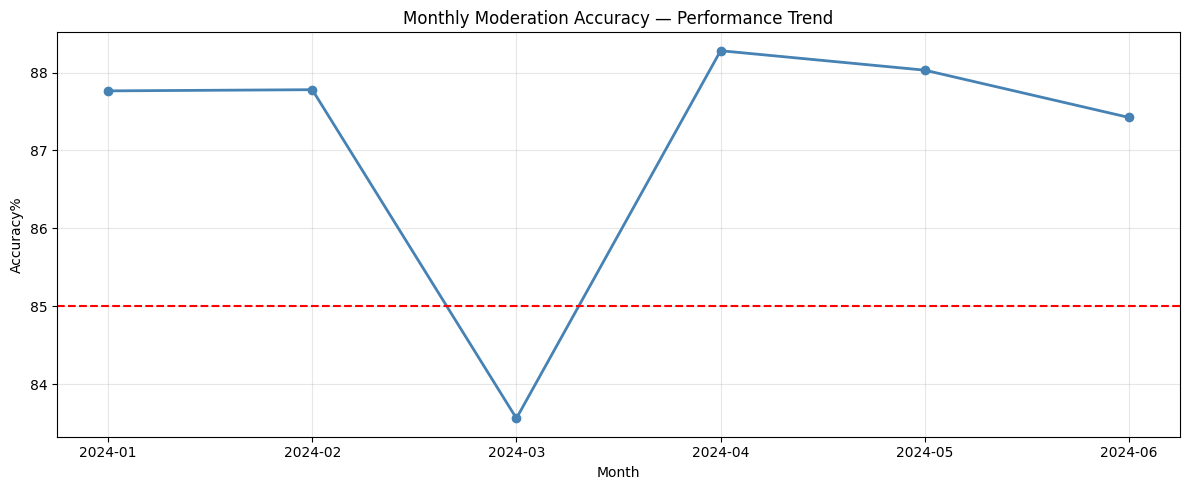

In [2]:
monthly_accuracy= df.groupby('month')['accuracy'].mean()*100
plt.figure(figsize=(12,5))
plt.plot(monthly_accuracy.index.astype(str),monthly_accuracy.values,marker='o', color='steelblue',linewidth=2)
plt.axhline(y=85, color='red', linestyle= '--', label= 'Targer(85%)')
plt.title('Monthly Moderation Accuracy — Performance Trend')
plt.ylabel('Accuracy%')
plt.xlabel('Month')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('C:/Users/vbsr0/Desktop/softwares and notes-20250719T171616Z-1-001/python projects/moderation_dashboard/data/monthly_accuracy.png', dpi=150)
plt.show()


==== Accuracy by Category: Feb vs Mar ====
content_category  Animal Cruelty  Bullying  Child Safety  Hate Speech  \
month                                                                   
2024-02                    88.44     88.10         87.16        87.78   
2024-03                    88.24     88.62         88.26        59.90   

content_category  Self Harm  Violence  
month                                  
2024-02               88.22     86.99  
2024-03               88.20     87.73  


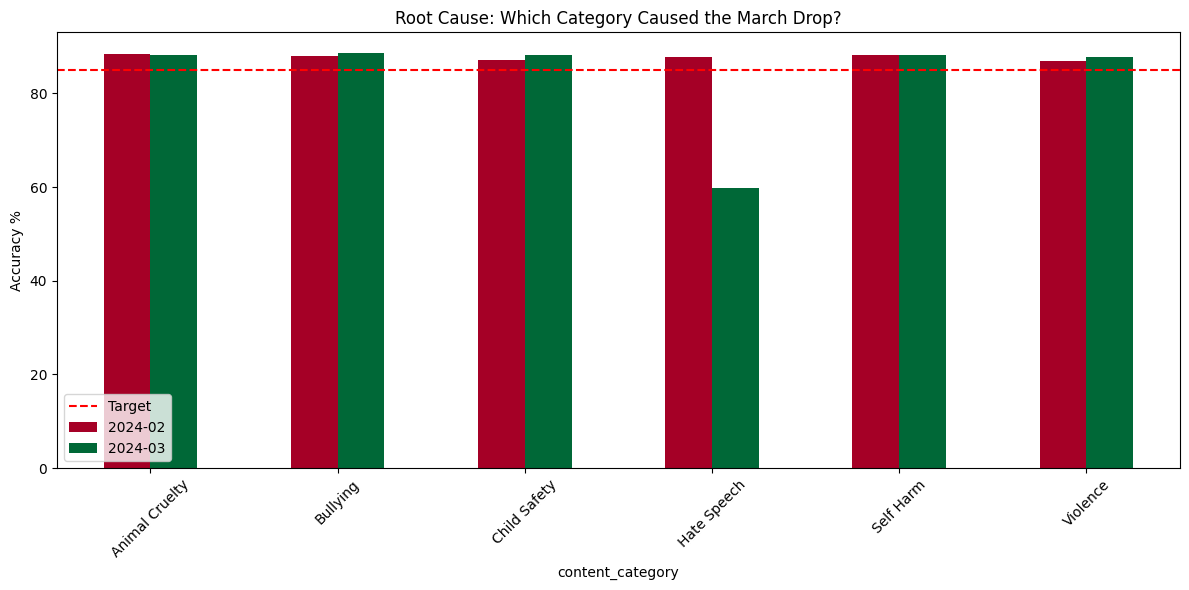

In [3]:
#filter feb and march
feb_mar= df[df['month'].isin([pd.Period('2024-02'), pd.Period('2024-03')])]

#breakdown by category
category_diagnosis= feb_mar.groupby(['month','content_category'])['accuracy']. mean().unstack()*100
print("==== Accuracy by Category: Feb vs Mar ====")
print(category_diagnosis.round(2))

#Visualize
category_diagnosis.T.plot(kind='bar', figsize=(12,6), colormap='RdYlGn')
plt.title('Root Cause: Which Category Caused the March Drop?')
plt.ylabel('Accuracy %')
plt.xticks(rotation=45)
plt.axhline(y=85, color='red', linestyle='--', label='Target')
plt.legend()
plt.tight_layout()
plt.savefig('C:/Users/vbsr0/Desktop/softwares and notes-20250719T171616Z-1-001/python projects/moderation_dashboard/data/root_cause_category.png', dpi=150)

plt.show()

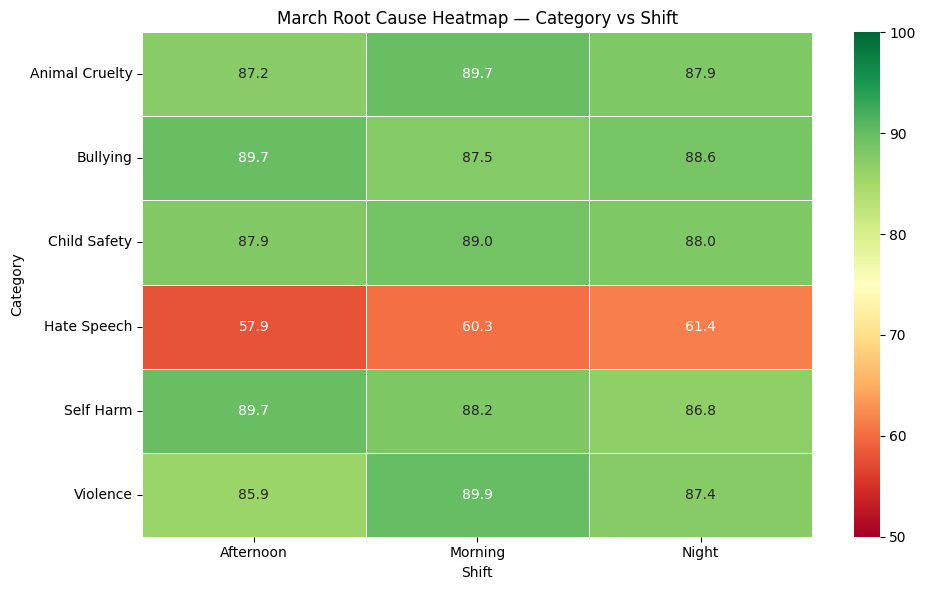

In [16]:
march_data = df[df['month'] == pd.Period('2024-03')]
shift_analysis= march_data.groupby(['content_category', 'shift'])['accuracy'].mean()*100
shift_df= shift_analysis.reset_index()
shift_df.columns= ['Category', 'Shift', 'Accuracy']
pivot= shift_df.pivot (index= 'Category', columns= 'Shift', values='Accuracy')

plt.figure(figsize=(10, 6))
sns.heatmap(pivot, annot=True, fmt='.1f', cmap='RdYlGn',vmin=50, vmax=100, linewidths=0.5)
plt.title('March Root Cause Heatmap — Category vs Shift')
plt.tight_layout()
plt.savefig('C:/Users/vbsr0/Desktop/softwares and notes-20250719T171616Z-1-001/python projects/moderation_dashboard/data/heatmap_root_cause.png', dpi=150)

plt.show()

In [17]:
findings = """
=== ROOT CAUSE ANALYSIS SUMMARY ===
Period Analyzed: March 2024

FINDING: Overall moderation accuracy dropped significantly in March 2024.

ROOT CAUSE IDENTIFIED:
- Primary driver: 'Hate Speech' category accuracy collapsed to 57-61% in March
- Afternoon shift showed worst performance at 57.9%
- Morning and Night shifts equally affected (60.3% and 61.4%)
- All other categories (Animal Cruelty, Bullying, Child Safety, 
  Self Harm, Violence) remained healthy between 85-90% across all shifts

KEY INSIGHT:
- The drop is NOT shift-specific — all three shifts show similar 
  underperformance on Hate Speech
- This rules out staffing or scheduling as the root cause
- The uniform failure across shifts points to a category-level 
  policy or guideline gap

HYPOTHESIS:
- Hate Speech moderation policies may have been updated in March 
  without adequate reviewer training
- Borderline Hate Speech content may lack clear decision guidelines,
  causing inconsistent outcomes across all reviewers

RECOMMENDED ACTIONS:
1. Immediate: Audit Hate Speech policy guidelines for ambiguity
2. Short term: Mandatory Hate Speech policy refresher for ALL shifts
3. Short term: Add Hate Speech accuracy as a standalone KPI 
   with a minimum 80% target in weekly scorecards
4. Long term: Create an escalation queue for borderline Hate Speech 
   cases to reduce inconsistent reviewer decisions
"""

print(findings)

with open('C:/Users/vbsr0/Desktop/softwares and notes-20250719T171616Z-1-001/python projects/moderation_dashboard/data/root_cause_findings.txt', 'w') as f:
    f.write(findings)

print("Findings saved!")


=== ROOT CAUSE ANALYSIS SUMMARY ===
Period Analyzed: March 2024

FINDING: Overall moderation accuracy dropped significantly in March 2024.

ROOT CAUSE IDENTIFIED:
- Primary driver: 'Hate Speech' category accuracy collapsed to 57-61% in March
- Afternoon shift showed worst performance at 57.9%
- Morning and Night shifts equally affected (60.3% and 61.4%)
- All other categories (Animal Cruelty, Bullying, Child Safety, 
  Self Harm, Violence) remained healthy between 85-90% across all shifts

KEY INSIGHT:
- The drop is NOT shift-specific — all three shifts show similar 
  underperformance on Hate Speech
- This rules out staffing or scheduling as the root cause
- The uniform failure across shifts points to a category-level 
  policy or guideline gap

HYPOTHESIS:
- Hate Speech moderation policies may have been updated in March 
  without adequate reviewer training
- Borderline Hate Speech content may lack clear decision guidelines,
  causing inconsistent outcomes across all reviewers

RECO